conda: pytorch_playground

In [1]:
!pwd

/Users/joey/Documents/GitHub/pytorch-playground_aaron-xichen/New Joey


In [3]:
# !pip install matplotlib

In [4]:
import torch, torchvision
from torch import nn
import torch.nn.functional as F
from torch import optim
from torch.autograd import Variable

import numpy as np
import matplotlib.pyplot as plt

torch.set_printoptions(linewidth=120)

In [5]:
print(torch.__version__)

1.4.0


# DATALOADER

In [6]:
######################################
#    Part I : Write Data Loaders     #
######################################

T = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
mnist_data_train = torchvision.datasets.MNIST('mnist_data',
                                              transform=T,
                                              download=True, 
                                              train=True)
mnist_data_valid = torchvision.datasets.MNIST('mnist_data',
                                             transform=T,
                                             download=True, 
                                             train=False)

bs = 128
mnist_dataloader_train = torch.utils.data.DataLoader(mnist_data_train, batch_size=bs)
mnist_dataloader_valid = torch.utils.data.DataLoader(mnist_data_valid, batch_size=bs)

### Exploring data

SAMPLE

In [7]:
print(len(mnist_data_train))
mnist_data_train.targets.bincount()

60000


tensor([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])

In [8]:
sample = next(iter(mnist_data_train))
image, label = sample
image.size()

torch.Size([1, 28, 28])

label: 5


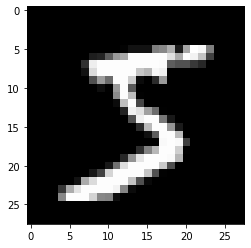

In [9]:
plt.imshow(image.squeeze(), cmap = "gray")
print("label:", label)

BATCH

In [10]:
batch = next(iter(mnist_dataloader_train))
images, labels = batch
images.size()

torch.Size([128, 1, 28, 28])

labels: tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6,
        0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5, 6, 1, 0, 0, 1, 7, 1, 6,
        3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9, 0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1, 5, 7, 1, 7, 1, 1, 6, 3, 0, 2, 9,
        3, 1, 1, 0, 4, 9, 2, 0, 0, 2, 0, 2, 7, 1, 8, 6, 4])


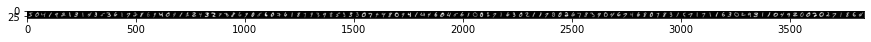

In [11]:
grid = torchvision.utils.make_grid(images, nrow = images.size()[0])
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))
print("labels:", labels)

# MODEL

In [75]:
# nn.Dropout()

In [73]:
######################################
#    Part II : Write the Neural Net  #
######################################

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 6, kernel_size = 5)
        
        self.conv2 = nn.Conv2d(in_channels = 6, out_channels = 12, kernel_size = 5)
        
        self.drop = nn.Dropout()
        
        self.fc1 = nn.Linear(in_features = 12*4*4, out_features = 120)
        self.fc2 = nn.Linear(in_features = 120, out_features = 60)
        self.out = nn.Linear(in_features = 60, out_features = 10)
        
    def forward(self, t):
        t = F.relu(self.conv1(t)) # HIDDEN CONV LAYER 1
        t = F.max_pool2d(t, kernel_size = 2, stride = 2)
        
        t = F.relu(self.conv2(t)) # HIDDEN CONV LAYER 2
        t = F.max_pool2d(t, kernel_size = 2, stride = 2)
        
        t = F.relu(self.fc1(self.drop(t.reshape(-1, 12*4*4)))) # HIDDEN FULLY CONNECTED LAYER 1
        t = F.relu(self.fc2(self.drop(t))) # HIDDEN FULLY CONNECTED LAYER 2
        t = self.out(t) # OUTPUT LAYER
        
        return t   
        
#     def forward(self, images):
#         # (1) INPUT LAYER
#         t = images
        
#         # (2) HIDDEN CONV LAYER 1
#         t = self.conv1(t)
#         t = F.relu(t)
#         t = F.max_pool2d(t, kernel_size = 2, stride = 2)
        
#         # (3) HIDDEN CONV LAYER 2
#         t = self.conv2(t)
#         t = F.relu(t)
#         t = F.max_pool2d(t, kernel_size = 2, stride = 2)
        
#         # (4) HIDDEN FULLY CONNECTED LAYER 1
#         t = t.reshape(-1, 12*4*4)
#         t = self.fc1(t)
#         t = F.relu(t)
        
#         # (5) HIDDEN FULLY CONNECTED LAYER 2
#         t = self.fc2(t)
#         t = F.relu(t)
        
#         # (6) OUTPUT LAYER
#         t = self.out(t)
#         #t = F.softmax(t, dim=1) # NOT NEEDED FOR CE_loss
#         return t

In [14]:
cnn = CNN()
print(cnn)
print("\n")
print(cnn.conv1)
# print("\n")
# print(cnn.conv1.weight)

CNN(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (drop): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)


Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))


### PREDICTIONS ON BATCH

In [15]:
preds = cnn(images)
print(preds.size())
#preds
preds.argmax(dim=1)

torch.Size([128, 10])


tensor([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [16]:
labels

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6,
        0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5, 6, 1, 0, 0, 1, 7, 1, 6,
        3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9, 0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1, 5, 7, 1, 7, 1, 1, 6, 3, 0, 2, 9,
        3, 1, 1, 0, 4, 9, 2, 0, 0, 2, 0, 2, 7, 1, 8, 6, 4])

In [17]:
# correct:
correct = preds.argmax(dim=1).eq(labels).sum().item()
print(correct)
# acc: 
acc = correct/len(labels)
print("accuracy: ", acc, "%")

13
accuracy:  0.1015625 %


In [18]:
def Get_accuracy(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()/len(labels)

In [19]:
loss = F.cross_entropy(preds, labels)
loss.item()

2.3059799671173096

In [22]:
#run again after backward
print(cnn.conv1.weight.grad.size())
cnn.conv1.weight.grad[0]

torch.Size([6, 1, 5, 5])


tensor([[[-4.7976e-04, -1.1270e-03, -1.6702e-03, -1.2453e-03, -7.4418e-05],
         [-1.2030e-03, -1.8316e-03, -1.7401e-03, -5.6457e-04, -4.0917e-04],
         [-1.1455e-03, -1.3458e-03, -4.7658e-04,  2.8992e-04,  2.7511e-04],
         [-5.7876e-04, -3.2019e-04, -3.5247e-05,  4.2343e-04, -7.1225e-05],
         [-8.3700e-04, -8.0947e-04, -8.7010e-04, -6.5687e-04, -1.8133e-05]]])

In [23]:
loss.backward()

RuntimeError: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.

In [24]:
optimizer = optim.Adam(cnn.parameters(), lr = 0.01)

In [25]:
# cnn.conv1.weight[0]

In [26]:
optimizer = optim.Adam(params = cnn.parameters(), lr = 0.001)
optimizer.step()

In [27]:
# cnn.conv1.weight[0]

# TRAIN LOOP

In [28]:
# ######################################
# #   Part III : Write Training Loop   #
# ######################################

# model = CNN()
# loss_function = nn.CrossEntropyLoss()
# optimizer = optim.Adam(params = model.parameters(), lr = 0.001)
# mnist_dataloader_train = torch.utils.data.DataLoader(mnist_data_train, batch_size= 128)

# def Get_correct(preds, labels):
#     return preds.argmax(dim=1).eq(labels).sum().item()
# def Get_accuracy(corrects, samples):
#     return Get_correct(preds, labels)/len(labels)

# n_epochs=3
# n_iterations=0

# for e in range(n_epochs):
#     total_loss = 0
#     total_correct = 0
    
#     for i, batch in enumerate(mnist_dataloader_train):
#         images, labels = batch
#         preds = model(images)
        
#         model.zero_grad()
#         loss = loss_function(preds, labels)
        
#         loss.backward()   
#         optimizer.step()
        
#         total_loss += loss.item()
#         total_correct += Get_correct(preds, labels)
        
#     print("[Epoch]:", e, "\n", 
#           "[train loss]:", loss.item() / bs, ",  ",
#           "[train accuracy]:", total_correct / len(mnist_data_train)), "\n"

### NOW WITH VALIDATION

In [98]:
######################################
#   Part III : Write Training Loop   #
######################################

model = CNN()
load = True
if load == True:
    load_e = 30
    model.load_state_dict(torch.load(f"model_folder/model_2_{load_e}.pt"))
    ep = load_e + 1 #e_previous
else: 
    ep = 0

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(params = model.parameters(), lr = 0.00001)
mnist_dataloader_train = torch.utils.data.DataLoader(mnist_data_train, batch_size= 128)

def Get_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()
def Get_accuracy(corrects, samples):
    return Get_correct(preds, labels)/len(labels)

n_epochs=15
n_iterations=0

for e in range(n_epochs):
    total_loss_train = 0
    total_correct_train = 0
    total_loss_valid = 0
    total_correct_valid = 0
    
    model.train()
    
    for i, batch in enumerate(mnist_dataloader_train):
        images, labels = batch
        preds = model(images)
        
        model.zero_grad()
        loss_train = loss_function(preds, labels)
        
        loss_train.backward()   
        optimizer.step()
        
        total_loss_train += loss.item()
        total_correct_train += Get_correct(preds, labels)
    
    model.eval()
    with torch.no_grad():
        for i, batch in enumerate(mnist_dataloader_valid):
            images, labels = batch
            preds = model(images)

            loss_valid = loss_function(preds, labels)

            total_loss_valid += loss.item()
            total_correct_valid += Get_correct(preds, labels)    
    
    model.train()
    torch.save(model.state_dict(), f"model_folder/model_2_{e+ep}.pt")
    
    print("[Epoch]:", e+ep, "\n", 
          "[train loss]:", loss_train.item() / bs, ",  ",
          "[train accuracy]:", total_correct_train / len(mnist_data_train), "\n",
          "[valid loss]:", loss_valid.item() / bs, ",  ",
          "[valid accuracy]:", total_correct_valid / len(mnist_data_valid), "\n")

[Epoch]: 31 
 [train loss]: 0.0025235817302018404 ,   [train accuracy]: 0.9324833333333333 
 [valid loss]: 4.5018903620075434e-05 ,   [valid accuracy]: 0.9751 

[Epoch]: 32 
 [train loss]: 0.0028201404493302107 ,   [train accuracy]: 0.9331 
 [valid loss]: 4.627387897926383e-05 ,   [valid accuracy]: 0.9748 

[Epoch]: 33 
 [train loss]: 0.004112642724066973 ,   [train accuracy]: 0.9345833333333333 
 [valid loss]: 4.506087498157285e-05 ,   [valid accuracy]: 0.9748 

[Epoch]: 34 
 [train loss]: 0.0037475135177373886 ,   [train accuracy]: 0.93385 
 [valid loss]: 4.4834883738076314e-05 ,   [valid accuracy]: 0.9748 

[Epoch]: 35 
 [train loss]: 0.0032885356340557337 ,   [train accuracy]: 0.9343 
 [valid loss]: 4.493303276831284e-05 ,   [valid accuracy]: 0.9744 

[Epoch]: 36 
 [train loss]: 0.002562715206295252 ,   [train accuracy]: 0.9352166666666667 
 [valid loss]: 4.6299999667098746e-05 ,   [valid accuracy]: 0.9747 



KeyboardInterrupt: 

### SAVE MODEL

In [99]:
save_model = 33
model.load_state_dict(torch.load(f"model_folder/model_2_{save_model}.pt"))
torch.save(model.state_dict(), "model_folder/model_2_best_1.pt")

# EMNIST DATA

In [31]:
######################################
#    Part I : Write Data Loaders     #
######################################

T = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
emnist_data_train = torchvision.datasets.EMNIST('emnist_data',
                                               split = "balanced",
                                               transform=T,
                                               download=True,
                                               train=True)
emnist_data_valid = torchvision.datasets.EMNIST('emnist_data',
                                               split = "balanced",
                                               transform=T,
                                               download=True,
                                               train=False)

bs = 128
emnist_dataloader_train = torch.utils.data.DataLoader(emnist_data_train, batch_size=bs)
emnist_dataloader_valid = torch.utils.data.DataLoader(emnist_data_valid, batch_size=bs)

In [32]:
print(len(emnist_data_train))
emnist_data_train.targets.bincount()

112800


tensor([2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400,
        2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400,
        2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400, 2400])

In [33]:
e_sample = next(iter(emnist_data_train))
e_image, e_label = e_sample
e_image.size()

torch.Size([1, 28, 28])

label: 45


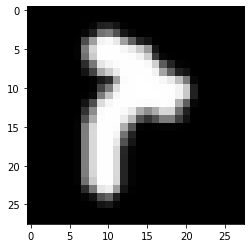

In [34]:
plt.imshow(e_image.squeeze(), cmap = "gray")
print("label:", e_label)

In [35]:
e_batch = next(iter(emnist_dataloader_train))
e_images, e_labels = e_batch
print(e_images.size())
e_labels.size()

torch.Size([128, 1, 28, 28])


torch.Size([128])

In [36]:
e_pred = cnn(e_image.unsqueeze(dim=0))
print(e_pred.size())
print(e_pred)
print(e_pred.argmax())
print(F.softmax(e_pred, dim=1))

torch.Size([1, 10])
tensor([[-0.0377,  0.0070, -0.0134, -0.0231,  0.0908, -0.0341,  0.0171, -0.0399, -0.0234, -0.0247]],
       grad_fn=<AddmmBackward>)
tensor(4)
tensor([[0.0970, 0.1015, 0.0994, 0.0984, 0.1103, 0.0974, 0.1025, 0.0968, 0.0984, 0.0983]], grad_fn=<SoftmaxBackward>)


In [37]:
# emnist_data_train.targets.bincount()

In [38]:
# grid = torchvision.utils.make_grid(images, nrow = 8)
# plt.figure(figsize=(15,15))
# plt.imshow(np.transpose(grid, (1,2,0)))
# print("labels:", labels)

# MC Dropout

In [161]:
#MNIST batch
m_batch = next(iter(mnist_dataloader_train))
m_images, m_labels = m_batch

In [165]:
MC_drop_list = []
for i in range(2):
    m_preds = model(m_images)

In [40]:
#EMNIST batch
e_batch = next(iter(emnist_dataloader_train))
e_images, e_labels = e_batch

In [70]:
e_preds = model(e_images)
e_preds

tensor([[ 3.5142, -1.0992,  0.8535,  ..., -1.4369,  2.3196, -1.8802],
        [ 3.1608, -6.5711,  0.8319,  ..., -4.4226, -3.7382,  1.3921],
        [-0.4666, -3.8779,  0.4696,  ..., -4.7831, -1.9859, -3.6750],
        ...,
        [-8.5964, -2.9795, -0.4570,  ...,  0.4600, -1.9728, -0.9934],
        [-3.5361,  1.0887,  7.8504,  ...,  3.3873,  1.2514, -6.0441],
        [ 5.2884, -3.5975,  4.6807,  ..., -3.0973, -2.9701, -2.9898]], grad_fn=<AddmmBackward>)

NICE, CAT -> MEAN

In [42]:
first = torch.empty([1,2,3])
second = torch.empty([1,2,3])
catted = torch.cat((first, second), dim=0)

In [50]:
print(catted.shape)
catted

torch.Size([2, 2, 3])


tensor([[[ 0.0000e+00, -2.0000e+00,  0.0000e+00],
         [-2.0000e+00,  1.4013e-44,  0.0000e+00]],

        [[ 0.0000e+00, -2.0000e+00,  0.0000e+00],
         [-2.0000e+00,  1.4013e-44,  0.0000e+00]]])

In [44]:
catted.mean(dim=0)

tensor([[ 0.0000e+00, -2.0000e+00,  0.0000e+00],
        [-2.0000e+00,  1.4013e-44,  0.0000e+00]])

ANOTHER WAY (faster)

In [58]:
m_preds = torch.cat([first, second]).mean(dim=0)
m_preds

tensor([[ 0.0000e+00, -2.0000e+00,  0.0000e+00],
        [-2.0000e+00,  1.4013e-44,  0.0000e+00]])

In [78]:
m_preds = torch.cat([first, second]).std(dim=0)
m_preds

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [48]:
print(m_preds.shape)
print(m_preds.unsqueeze(dim=0).shape)
print(torch.cat((m_preds.unsqueeze(dim=0), m_preds.unsqueeze(dim=0)), dim=0).shape)

torch.Size([2, 3])
torch.Size([1, 2, 3])
torch.Size([2, 2, 3])
